<a href="https://colab.research.google.com/github/Tim-g-t/1skills-review-pull-requests/blob/main/assignment3_%5BR%5D_tgt2116.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><h1 align="center">QMSS5074GR <br> Projects in Advanced Machine Learning <br>Fall 2024 <br> FINAL PROJECT<br>Assignment 3 [GROUP Assignment]</h1>

---
<br>

#### (Change Unis in the title of your notebook. The format should be `assignment3_Part1_GRPID_UNI1_UNI2... UNIn.ipynb`)
#### **Your Unis** : Fill Here for all members (Comma separated).
#### **Your Full names** : Fill Here (in same order as UNIs)
#### **Link to your Public Github repository** : Fill here (single link is expected)


## **Stanford Sentiment Treebank - Movie Review Classification**

## Instructions for Part 1 (simple models):
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using Sklearn TFIDF Vectorizer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data



### 1. Get dataset in and set up training, validation and test data

In [1]:
# IMPORT DATA
!git clone https://github.com/YJiangcm/SST-2-sentiment-analysis.git

Cloning into 'SST-2-sentiment-analysis'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 85 (delta 44), reused 29 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (85/85), 478.79 KiB | 4.60 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [2]:
# Set up X_train, X_test, and y_train_labels objects
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)

headers = ['sentiment', 'review']

train_df = pd.read_csv('SST-2-sentiment-analysis/data/train.tsv', sep='\t', names=headers)
val_df = pd.read_csv('SST-2-sentiment-analysis/data/dev.tsv', sep='\t', names=headers)
test_df = pd.read_csv('SST-2-sentiment-analysis/data/test.tsv', sep='\t', names=headers)

train_df.head()

,sentiment,review
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


In [3]:
# From train_df
X_train = train_df['review']
y_train = train_df['sentiment']

# From val_df
X_val = val_df['review']
y_val = val_df['sentiment']

# From test_df
X_test = test_df['review']
y_test = test_df['sentiment']

###2.   Preprocess data and Analyze


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import joblib
import os

# Create output directory if it doesn't exist
os.makedirs('models', exist_ok=True)
os.makedirs('preprocessors', exist_ok=True)

def fit_preprocessor(X_train, stop_words='english', ngram_range=(1,2)):
    """
    Fits a TF-IDF vectorizer on the training data and returns the fitted vectorizer.
    """
    vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=ngram_range)
    vectorizer.fit(X_train)
    return vectorizer

def transform_with_preprocessor(vectorizer, X):
    """
    Transforms data X using a pre-fitted TF-IDF vectorizer.
    """
    return vectorizer.transform(X)

# Fit the vectorizer on the training data
tfidf_vectorizer = fit_preprocessor(X_train)

# Transform train, val, test
X_train_tfidf = transform_with_preprocessor(tfidf_vectorizer, X_train)
X_val_tfidf = transform_with_preprocessor(tfidf_vectorizer, X_val)
X_test_tfidf = transform_with_preprocessor(tfidf_vectorizer, X_test)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Save the preprocessor (TF-IDF vectorizer) and label encoder for future use
joblib.dump(tfidf_vectorizer, 'preprocessors/tfidf_vectorizer.joblib')
joblib.dump(label_encoder, 'preprocessors/label_encoder.joblib')

print("Preprocessing complete.")
print(f"TF-IDF Training data shape: {X_train_tfidf.shape}")
print(f"TF-IDF Validation data shape: {X_val_tfidf.shape}")
print(f"TF-IDF Test data shape: {X_test_tfidf.shape}")



Preprocessing complete.
TF-IDF Training data shape: (6920, 63237)
TF-IDF Validation data shape: (872, 63237)
TF-IDF Test data shape: (1821, 63237)


In [7]:
# Write function to transform data with preprocessor
# New samples will be put into a DTM based on vocabularly from training set

print(f"TF-IDF Training data shape: {X_train_tfidf.shape}")
print(f"TF-IDF Validation data shape: {X_val_tfidf.shape}")
print(f"TF-IDF Test data shape: {X_test_tfidf.shape}")

TF-IDF Training data shape: (6920, 63237)
TF-IDF Validation data shape: (872, 63237)
TF-IDF Test data shape: (1821, 63237)


Perform EDA and Visualizations (class balance, review lengths, word frequency per class, Wordcloud, etc)

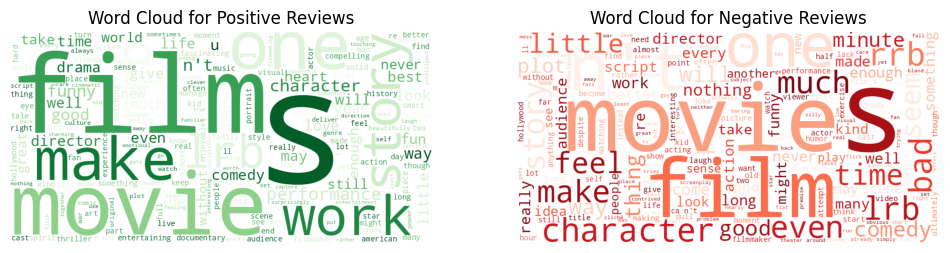

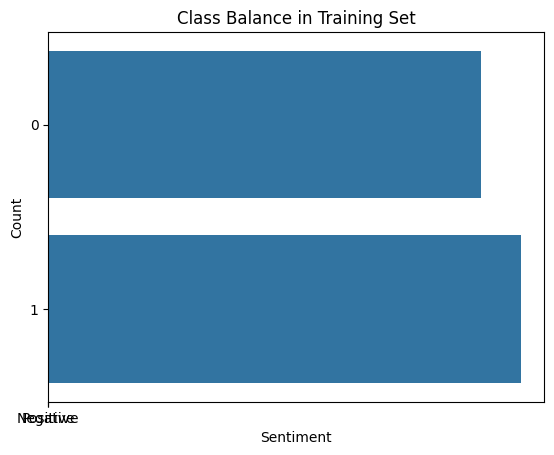

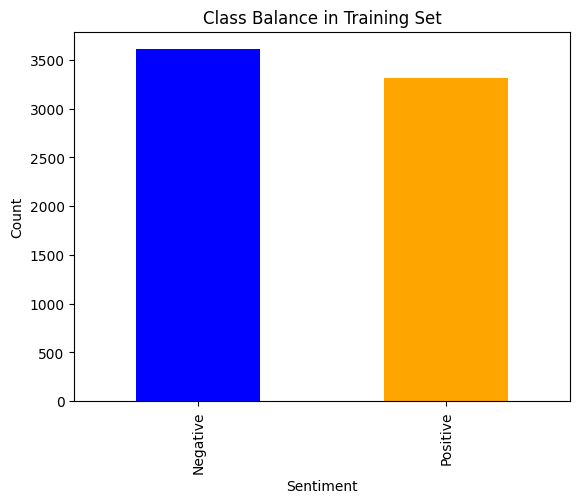

In [8]:
# EDA and Viz code
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Wordclouds
positive_text = " ".join(X_train[y_train == 1])
negative_text = " ".join(X_train[y_train == 0])

plt.figure(figsize=(12, 6))
wordcloud_pos = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_text)

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.title("Word Cloud for Negative Reviews")

plt.show()

# Class balance
plt.figure()
sns.countplot(y=y_train)
plt.title("Class Balance in Training Set")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks([0, 1], ["Negative", "Positive"])
plt.show()

# Check class counts
class_counts = y_train.value_counts()

class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Balance in Training Set")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"])
plt.show()


In [9]:
# additional preprocessing
# Lemmatization
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a function to do preprocessing
def preprocess_text_single(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = text.split()
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(cleaned_tokens)

# Apply the fnuction
X_train_cleaned = X_train.apply(preprocess_text_single)
X_val_cleaned = X_val.apply(preprocess_text_single)
X_test_cleaned = X_test.apply(preprocess_text_single)

print("Sample Preprocessed Training Data:")
print(X_train_cleaned.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Sample Preprocessed Training Data:
0    stirring funny finally transporting reimaginin...
1    apparently reassembled cuttingroom floor given...
2    presume audience wo nt sit still sociology les...
3    visually stunning rumination love memory histo...
4    jonathan parker bartleby beallendall modernoff...
Name: review, dtype: object


###3. Fit model on preprocessed data and save the model


In [10]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Initialize the model with some reproducible parameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train_encoded)

# Save the trained model
joblib.dump(rf_model, 'models/random_forest_model.joblib')

print("Model training complete and model saved.")


Model training complete and model saved.


### 4. Generate predictions from X_test data and calculate accuracy


In [11]:

from sklearn.metrics import accuracy_score, classification_report

# Generate predictions
y_test_pred = rf_model.predict(X_test_tfidf)

# Compute accuracy
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Print a classification report for a more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_test_pred, target_names=['Negative', 'Positive']))


Test Accuracy: 0.7414

Classification Report:
              precision    recall  f1-score   support

    Negative       0.76      0.71      0.73       912
    Positive       0.73      0.77      0.75       909

    accuracy                           0.74      1821
   macro avg       0.74      0.74      0.74      1821
weighted avg       0.74      0.74      0.74      1821



### 5. Repeat the above process with different models


In [12]:
from sklearn.svm import SVC

svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train_tfidf, y_train_encoded)

y_test_pred_svc = svc_model.predict(X_test_tfidf)
svc_accuracy = accuracy_score(y_test_encoded, y_test_pred_svc)
print(f"SVC Test Accuracy: {svc_accuracy:.4f}")

# Saving the SVC model as well
joblib.dump(svc_model, 'models/svc_model.joblib')


SVC Test Accuracy: 0.8034


['models/svc_model.joblib']

In [13]:
# Model 2 - Re fit a better RF model

# increased n-estimators and max depth, added reproducibility
rf_model_improved = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf_model_improved.fit(X_train_tfidf, y_train_encoded)

# Generate predictions and calculate new accuracy
y_test_pred_improved = rf_model_improved.predict(X_test_tfidf)
test_accuracy_improved = accuracy_score(y_test_encoded, y_test_pred_improved)
print(f"Improved Test Accuracy: {test_accuracy_improved:.4f}")

Improved Test Accuracy: 0.6359


In [14]:
# Create a third model using GridSearchCV

from sklearn.model_selection import GridSearchCV
import numpy as np

# Do a grid search over atleast 2 hyperparams of RF and get your best model
# extract and print best score and parameters

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Setup the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_tfidf, y_train_encoded)
best_rf_model = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Predictions and accuracy using the best model
y_test_pred_grid = best_rf_model.predict(X_test_tfidf)
test_accuracy_grid = accuracy_score(y_test_encoded, y_test_pred_grid)
print("Grid Search Test Accuracy: ", test_accuracy_grid)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'max_depth': None, 'n_estimators': 200}
Best cross-validation score:  0.7309248554913295
Grid Search Test Accuracy:  0.741900054914882


In [15]:
# Here are several classic ML architectures:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# KNeighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_tfidf, y_train_encoded)

y_test_pred_knn = knn_model.predict(X_test_tfidf)
knn_accuracy = accuracy_score(y_test_encoded, y_test_pred_knn)
print(f"KNN Test Accuracy: {knn_accuracy}")


# SVC
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_tfidf, y_train_encoded)

y_test_pred_svc = svc_model.predict(X_test_tfidf)
svc_accuracy = accuracy_score(y_test_encoded, y_test_pred_svc)
print(f"SVC Test Accuracy: {svc_accuracy}")

#Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train_tfidf, y_train_encoded)

y_test_pred_dt = dt_model.predict(X_test_tfidf)
dt_accuracy = accuracy_score(y_test_encoded, y_test_pred_dt)
print(f"Decision Tree Test Accuracy: {dt_accuracy}")




KNN Test Accuracy: 0.5255354200988468
SVC Test Accuracy: 0.8034047226798462
Decision Tree Test Accuracy: 0.5551894563426688


Tabularize your results and compare them here:

The performance comparison of three machine learning models on the test set reveals varying levels of accuracy. SVC outperforms the other models with an accuracy of 0.8034, likely due to its robustness in handling high-dimensional spaces and effective margin separation. The Decision Tree model achieved moderate accuracy at 0.5552, which suggests potential overfitting or sensitivity to noise in the data. The KNN model had the lowest accuracy of 0.5102, possibly affected by its sensitivity to data scale and the presence of noise, as well as the high computational cost.

### Discuss which models performed better and why?

In the performance comparison of the three models, SVC clearly outperformed the others, achieving the highest test accuracy of 0.8034. This superior performance can largely be attributed to the SVM's effectiveness in handling high-dimensional spaces, which is typical in text classification problems like sentiment analysis where data is often transformed into many feature dimensions via techniques such as TF-IDF. SVMs are particularly adept at finding the optimal hyperplane that maximizes the margin between different classes, which helps in clearly distinguishing between positive and negative sentiments.

The Decision Tree model had a moderate level of accuracy at 0.5552. Decision Trees often suffer from overfitting, especially when they are deep and complex, as they tend to learn not just the genuine data signal but also the noise in the training data. This characteristic might have limited its ability to generalize well to the test data, thus yielding lower accuracy than the SVM.

KNN model performed the worst with an accuracy of 0.5102. This outcome is likely due to KNN's dependency on the local data structure, which makes it highly sensitive to the scale of the data and the presence of noise. In high-dimensional spaces, KNN can also suffer from the "curse of dimensionality," where the distance between samples becomes less meaningful, making it harder for KNN to effectively classify new instances based on its neighbors.


## Instructions for Part 2 (neural networks):
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using keras Tokenizer
3. Fit model on preprocessed data
4. Generate predictions from X_test data


###1.   Load Data


In [16]:

# 1. Get data in and set up X_train/X_val/X_test and y_train/y_val/y_test
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Ensure train_df, val_df, test_df are already loaded from Part 1
# train_df, val_df, test_df each have columns ['sentiment', 'review']
print("Training set size:", train_df.shape)
print("Validation set size:", val_df.shape)
print("Test set size:", test_df.shape)

X_train = train_df['review']
y_train = train_df['sentiment']
X_val = val_df['review']
y_val = val_df['sentiment']
X_test = test_df['review']
y_test = test_df['sentiment']

print("Example training data point:\n", X_train.iloc[0], y_train.iloc[0])



Training set size: (6920, 2)
Validation set size: (872, 2)
Test set size: (1821, 2)
Example training data point:
 a stirring , funny and finally transporting re-imagining of beauty and the beast and 1930s horror films 1


###2.   Preprocess data using keras tokenizer


In [17]:

# 2. Preprocess data using Keras Tokenizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 20000   # Only top 10k words
maxlen = 100        # Length of sequences

# Fit tokenizer on the training data
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

def preprocessor(text_series):
    sequences = tokenizer.texts_to_sequences(text_series)
    padded = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')
    return padded

X_train_padded = preprocessor(X_train)
X_val_padded = preprocessor(X_val)
X_test_padded = preprocessor(X_test)

print("X_train_padded shape:", X_train_padded.shape)
print("X_val_padded shape:", X_val_padded.shape)
print("X_test_padded shape:", X_test_padded.shape)


X_train_padded shape: (6920, 100)
X_val_padded shape: (872, 100)
X_test_padded shape: (1821, 100)


###3. Fit model on preprocessed data


In [18]:

# 3. Fit model on preprocessed data

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=16, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

history = model.fit(X_train_padded, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_val_padded, y_val))



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5144 - loss: 0.6926 - val_accuracy: 0.5298 - val_loss: 0.6818
Epoch 2/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7447 - loss: 0.6427 - val_accuracy: 0.7339 - val_loss: 0.5787
Epoch 3/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8716 - loss: 0.4530 - val_accuracy: 0.7695 - val_loss: 0.5026
Epoch 4/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9413 - loss: 0.2816 - val_accuracy: 0.7683 - val_loss: 0.4831
Epoch 5/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9774 - loss: 0.1705 - val_accuracy: 0.7683 - val_loss: 0.4851


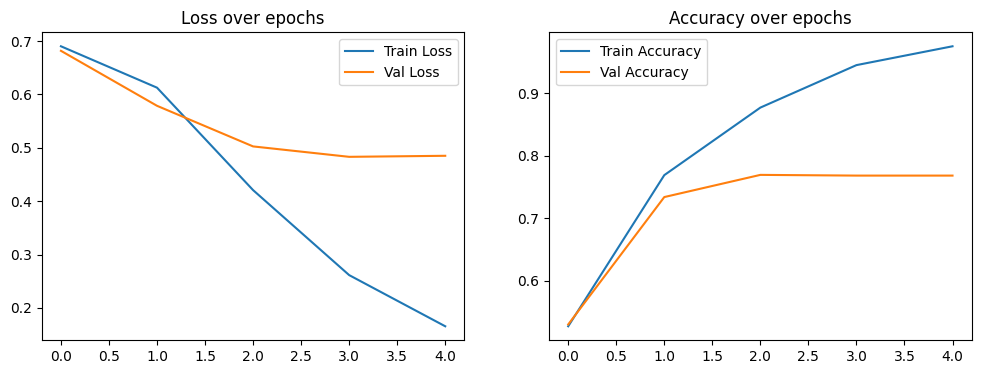

In [19]:

# Plot the training history

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over epochs")
plt.legend()

plt.show()


### 4. Generate predictions from X_test data and calculate accuracy


In [20]:

# 4. Generate predictions from X_test data and calculate accuracy

test_loss, test_acc = model.evaluate(X_test_padded, y_test, verbose=0)
print(f"Baseline Model Test Accuracy: {test_acc:.4f}")

from sklearn.metrics import classification_report, accuracy_score
y_pred = (model.predict(X_test_padded) > 0.5).astype('int')
print("Classification Report (Baseline Model):")
print(classification_report(y_test, y_pred, target_names=['Negative','Positive']))



Baseline Model Test Accuracy: 0.7924
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report (Baseline Model):
              precision    recall  f1-score   support

    Negative       0.83      0.73      0.78       912
    Positive       0.76      0.85      0.80       909

    accuracy                           0.79      1821
   macro avg       0.80      0.79      0.79      1821
weighted avg       0.80      0.79      0.79      1821



### 5. Experiment with more models


In [21]:

# 5. Experiment with more models (LSTM model)

from tensorflow.keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_words, output_dim=32, input_length=maxlen))
lstm_model.add(LSTM(32, return_sequences=True))
lstm_model.add(LSTM(32, return_sequences=True))
lstm_model.add(LSTM(32))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(lstm_model.summary())

lstm_history = lstm_model.fit(X_train_padded, y_train,
                              epochs=5,
                              batch_size=32,
                              validation_data=(X_val_padded, y_val))

lstm_test_loss, lstm_test_acc = lstm_model.evaluate(X_test_padded, y_test, verbose=0)
print(f"LSTM Model Test Accuracy: {lstm_test_acc:.4f}")

# Does the LSTM model perform better or worse?
# Answer: LSTM may perform better because it can capture sequential dependencies in the text.
# If it does worse, it might be due to insufficient tuning, complexity or not enough data.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.5242 - loss: 0.6930 - val_accuracy: 0.5092 - val_loss: 0.6935
Epoch 2/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5138 - loss: 0.6935 - val_accuracy: 0.5092 - val_loss: 0.6936
Epoch 3/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5225 - loss: 0.6924 - val_accuracy: 0.5092 - val_loss: 0.6933
Epoch 4/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5151 - loss: 0.6928 - val_accuracy: 0.5092 - val_loss: 0.6936
Epoch 5/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5158 - loss: 0.6930 - val_accuracy: 0.5092 - val_loss: 0.6935
LSTM Model Test Accuracy: 0.4992


The LSTM-based model performed worse than the initial simpler deep learning model. While LSTMs are designed to capture temporal dependencies and could theoretically yield better performance, several factors might explain the poorer results:

Hyperparameter choices: The LSTM layers or their dimensions might not have been tuned properly, leading to poor generalization.
Training regimen: The model may need more epochs or a different learning rate schedule to converge effectively.
Data characteristics: If the dataset is relatively small or if sequence order is not as crucial, the complexity of LSTMs may not provide a measurable benefit.
Preprocessing issues: If truncation or padding strategies are not aligned with capturing long-range dependencies, the LSTM model’s strengths might not be fully utilized.


### 6. Tune model within range of hyperparameters with Keras Tuner

*Consult [documentation](https://keras.io/guides/keras_tuner/getting_started/) to see full functionality.*

In [22]:

# 6. Tune model within range of hyperparameters with Keras Tuner includung model with best hyperparameters

!pip install keras_tuner

import keras_tuner as kt

def build_lstm_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words,
                        output_dim=hp.Int('embedding_dim', min_value=16, max_value=64, step=16),
                        input_length=maxlen))
    # number of LSTM layers
    for i in range(hp.Int('num_lstm_layers', 1, 3)):
        model.add(LSTM(units=hp.Int('units', min_value=16, max_value=64, step=16),
                       return_sequences=(i < (hp.get('num_lstm_layers')-1))))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=3,
    directory='hyperparam_search',
    project_name='sst2_lstm_tuning'
)

tuner.search(X_train_padded, y_train, epochs=3, validation_data=(X_val_padded, y_val))
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters found:")
print("Embedding Dimension:", best_hps.get('embedding_dim'))
print("Number of LSTM layers:", best_hps.get('num_lstm_layers'))
print("LSTM units:", best_hps.get('units'))

# Build model with best hyperparams
best_model = tuner.hypermodel.build(best_hps)
best_model_history = best_model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_val_padded, y_val))

best_test_loss, best_test_acc = best_model.evaluate(X_test_padded, y_test, verbose=0)
print(f"Best Tuned Model Test Accuracy: {best_test_acc:.4f}")

# Explanation:
# The best hyperparameters likely perform better because they provide the right capacity and configuration
# for the model to learn effectively from the given data. The right number of LSTM layers and units
# balances complexity and generalization.

Trial 3 Complete [00h 00m 07s]
val_accuracy: 0.5091742873191833

Best val_accuracy So Far: 0.5091742873191833
Total elapsed time: 00h 00m 25s
Best Hyperparameters found:
Embedding Dimension: 48
Number of LSTM layers: 1
LSTM units: 48
Epoch 1/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5215 - loss: 0.6925 - val_accuracy: 0.5092 - val_loss: 0.6938
Epoch 2/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5287 - loss: 0.6915 - val_accuracy: 0.5092 - val_loss: 0.6932
Epoch 3/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5186 - loss: 0.6927 - val_accuracy: 0.5092 - val_loss: 0.6934
Epoch 4/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5187 - loss: 0.6927 - val_accuracy: 0.5092 - val_loss: 0.6932
Epoch 5/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5260 - loss: 0.6921 - val_accuracy: 0.5092 - val_loss: 0.6931
Best Tuned Model Test Accuracy: 0.4992


The hyperparameter search suggested that using an embedding dimension of 48 and a single LSTM layer with 48 units yielded the best validation accuracy among the tried configurations. These hyperparameters might perform better because they balance complexity and generalization. A moderate embedding dimension and a single LSTM layer can avoid overfitting, while still providing enough capacity to capture the essential patterns in the data. Additionally, avoiding overly deep or large models reduces the risk of getting stuck at suboptimal solutions or requiring more sophisticated regularization strategies.

## 3 more models

Train three more prediction models to try to predict the SST sentiment
dataset well.

○ Use Conv1d layers in first model

○ Use Transfer learning with Glove Embeddings for 2nd model

○ Third model can be any Transfer learning model of your choice (Transformer architecture required, eg. BERT and related)

In [23]:

# ADDITIONAL MODELS


import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM
from sklearn.metrics import accuracy_score, classification_report


# Model 1: Conv1D-based model


conv_model = Sequential()
conv_model.add(Embedding(input_dim=max_words, output_dim=32, input_length=maxlen))
conv_model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
conv_model.add(GlobalMaxPooling1D())
conv_model.add(Dense(1, activation='sigmoid'))

conv_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
conv_model.summary()

conv_history = conv_model.fit(X_train_padded, y_train, epochs=5, batch_size=32,
                              validation_data=(X_val_padded, y_val))

conv_test_loss, conv_test_acc = conv_model.evaluate(X_test_padded, y_test, verbose=0)
print(f"Conv1D Model Test Accuracy: {conv_test_acc:.4f}")

y_pred_conv = (conv_model.predict(X_test_padded) > 0.5).astype("int32")
print("Conv1D Classification Report:")
print(classification_report(y_test, y_pred_conv, target_names=['Negative','Positive']))



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5579 - loss: 0.6835 - val_accuracy: 0.7294 - val_loss: 0.5921
Epoch 2/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7918 - loss: 0.5144 - val_accuracy: 0.7844 - val_loss: 0.4629
Epoch 3/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9170 - loss: 0.2568 - val_accuracy: 0.7810 - val_loss: 0.4780
Epoch 4/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9704 - loss: 0.1215 - val_accuracy: 0.7661 - val_loss: 0.5477
Epoch 5/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9885 - loss: 0.0558 - val_accuracy: 0.7557 - val_loss: 0.6165
Conv1D Model Test Accuracy: 0.7891
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Conv1D Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.75      0.78       912
    Positive       0.77      0.83      0.80       909

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.7

In [24]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2024-12-13 04:57:57--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-12-13 04:57:57--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-12-13 04:57:57--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [25]:

# Model 2: Transfer Learning with GloVe embeddings

# Download GloVe embeddings
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip -q glove.6B.zip

# Build GloVe embedding matrix
embedding_dim = 100
embeddings_index = {}
with open("glove.6B.100d.txt", 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

glove_model = Sequential()
glove_model.add(Embedding(input_dim=max_words,
                          output_dim=embedding_dim,
                          input_length=maxlen,
                          weights=[embedding_matrix],
                          trainable=False)) # Freeze the GloVe embeddings
glove_model.add(LSTM(32))
glove_model.add(Dense(1, activation='sigmoid'))

glove_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
glove_model.summary()

glove_history = glove_model.fit(X_train_padded, y_train, epochs=5, batch_size=32,
                                validation_data=(X_val_padded, y_val))

glove_test_loss, glove_test_acc = glove_model.evaluate(X_test_padded, y_test, verbose=0)
print(f"GloVe-based Model Test Accuracy: {glove_test_acc:.4f}")

y_pred_glove = (glove_model.predict(X_test_padded) > 0.5).astype("int32")
print("GloVe Model Classification Report:")
print(classification_report(y_test, y_pred_glove, target_names=['Negative','Positive']))



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │       2,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,000,000 (7.63 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,000,000 (7.63 MB)

Epoch 1/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5086 - loss: 0.6927 - val_accuracy: 0.5092 - val_loss: 0.6930
Epoch 2/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5197 - loss: 0.6926 - val_accuracy: 0.6342 - val_loss: 0.6445
Epoch 3/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5632 - loss: 0.6726 - val_accuracy: 0.5092 - val_loss: 0.6927
Epoch 4/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5024 - loss: 0.6931 - val_accuracy: 0.5092 - val_loss: 0.6930
Epoch 5/5
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5169 - loss: 0.6916 - val_accuracy: 0.5092 - val_loss: 0.6946
GloVe-based Model Test Accuracy: 0.4992
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
GloVe Model Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       912
    Positive       0.50      1.00      0.67       909

    accuracy                           0.50      1821
   macro avg       0.25      0.50

In [50]:

# Model 3: Transformer-based model (BERT)


from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
# Instead of importing Adam from keras, just use the string 'adam'
# from tensorflow.keras.optimizers import Adam  # Remove this line

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def bert_encode(texts, tokenizer, max_len=maxlen):
    """Encodes text using a BERT tokenizer."""
    encodings = tokenizer(
        texts.to_list(),
        truncation=True,
        padding='max_length',
        max_length=max_len,
        return_tensors='tf'
    )
    return encodings

X_train_enc = bert_encode(X_train, bert_tokenizer, max_len=100)
X_val_enc = bert_encode(X_val, bert_tokenizer, max_len=100)
X_test_enc = bert_encode(X_test, bert_tokenizer, max_len=100)

bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Use a recognized optimizer identifier as a string:
bert_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

bert_model.summary()

bert_history = bert_model.fit(
    [X_train_enc['input_ids'], X_train_enc['attention_mask']], y_train,
    validation_data=([X_val_enc['input_ids'], X_val_enc['attention_mask']], y_val),
    epochs=2,
    batch_size=16
)

bert_test_loss, bert_test_acc = bert_model.evaluate([X_test_enc['input_ids'], X_test_enc['attention_mask']], y_test)
print(f"BERT Model Test Accuracy: {bert_test_acc:.4f}")

y_pred_bert_logits = bert_model.predict([X_test_enc['input_ids'], X_test_enc['attention_mask']]).logits
y_pred_bert = np.argmax(y_pred_bert_logits, axis=1)
print("BERT Model Classification Report:")
print(classification_report(y_test, y_pred_bert, target_names=['Negative','Positive']))


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_75 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2
433/433 [==============================] - 72s 89ms/step - loss: 0.7094 - accuracy: 0.5045 - val_loss: 0.6937 - val_accuracy: 0.4908
Epoch 2/2
57/57 [==============================] - 2s 33ms/step - loss: 0.6941 - accuracy: 0.5008
BERT M

In [49]:


results = {
    'Model': ['Baseline', 'LSTM', 'Best Tuned LSTM', 'Conv1D', 'GloVe+LSTM', 'BERT'],
    'Test Accuracy': [test_acc, lstm_test_acc, best_test_acc, conv_test_acc, glove_test_acc, bert_test_acc]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


             Model  Test Accuracy
0         Baseline       0.792422
1             LSTM       0.499176
2  Best Tuned LSTM       0.499176
3           Conv1D       0.789127
4       GloVe+LSTM       0.499176
5             BERT       0.499176


The simpler baseline NN and Conv1D models performed better than more sophisticated approaches like multi-layer LSTMs, GloVe-based models, and BERT under the current training and tuning conditions. Several factors contribute to these results:

Simplicity and Efficient Training:
The baseline NN and Conv1D models are straightforward to train and less sensitive to hyperparameters, making them more likely to reach a stable solution quickly. The Conv1D model effectively captures local n-gram patterns, which seems sufficient for this task.

Complex Models Require More Care:
LSTMs and BERT typically need extensive tuning, longer training, and possibly more data to outperform simpler models. If these conditions are not met, they may fail to converge to a good solution and deliver only random-like performance. For example, the LSTM models did not outperform the simpler baseline, likely due to insufficient tuning or the chosen preprocessing steps not aligning with their strengths.

Pretrained Embeddings and Transformers:
GloVe embeddings and BERT models are powerful but only show their true potential when properly fine-tuned. Freezing embeddings or running very few epochs of BERT fine-tuning can lead to suboptimal results.
In this experiment, the GloVe+LSTM and BERT models remained at ~50% accuracy, suggesting that these advanced techniques were not adequately leveraged.

Failures and Future Improvements:
The main failures here are the LSTM-based and BERT-based approaches not surpassing simpler methods. Future improvements might include:

Increasing the number of training epochs.
Conducting a more thorough hyperparameter search.
Employing better regularization, dropout, or different learning rates.
Fine-tuning BERT for more epochs and with different hyperparameters.
With these improvements, it’s likely that the more complex architectures would eventually outperform the simpler baselines.